<a href="https://colab.research.google.com/github/xalejandrow/data-preprocessing-project-tutorial/blob/main/explore_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [ ]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
!pip install seaborn
import seaborn as sns
import seaborn as sb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 14.5 MB/s eta 0:00:00


In [ ]:
#Reading the train and test data and assign to a variable

test_data = pd.read_csv('../assets/titanic_test.csv')
train_data = pd.read_csv('../assets/titanic_train.csv')

In [ ]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def categorize_age(input_data, age_bin_size):
  i = 'a'
  for a in range(0,91,age_bin_size):
    input_data.loc[(input_data['Age'] >= a) & (input_data['Age'] < a+age_bin_size),
                   'age_bin'] = i + '. [' + str(a) + ',' + str(a+age_bin_size) + ')'
    i = chr(ord(i) + 1)
  input_data.loc[(input_data['Age'].isna()), 'age_bin'] = 'null'

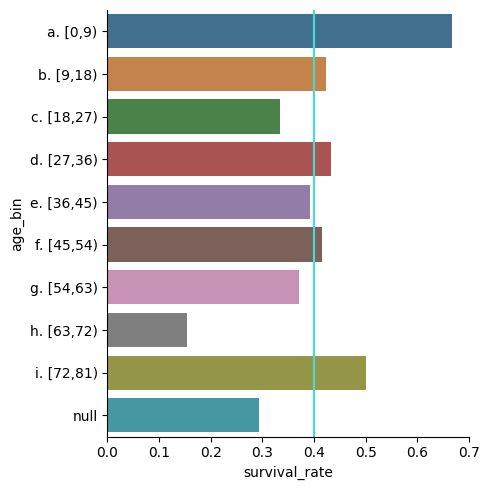

In [ ]:
df = train_data.copy()
df['age_bin'] = None
categorize_age(df,9)
df['Survived'] = df['Survived'].astype(int)
age_dist = df.groupby(['age_bin'])['Survived'
                                  ].describe().reset_index().sort_values('age_bin')
g = sb.catplot(y='age_bin', x='mean', 
               data=age_dist, saturation=.5, kind='bar', ci=None)
g.set_xlabels('survival_rate')
plt.axvline(0.4, 0, 3, color='turquoise')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.PassengerId.nunique()
train_data.Ticket.nunique()
train_data.Cabin.nunique()
train_data.Parch.nunique()

7

In [ ]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.500,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.200,NaN,C
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_data

mn = train_data[(train_data["Sex"]=="male") & (train_data["Survived"]==0)]
fn = train_data[(train_data["Sex"]=="female") & (train_data["Survived"]==0)]
ms = train_data[(train_data["Sex"]=="male") & (train_data["Survived"]==1)]
fs = train_data[(train_data["Sex"]=="female") & (train_data["Survived"]==1)]
mn = len(mn)
fn = len(fn)
ms = len(ms)
fs = len(fs)
print(f"mn:{mn}, ms:{ms}, fn:{fn}, fs:{fs}")

mn:468, ms:109, fn:81, fs:233


In [ ]:
print(ms / (ms + mn)) 

0.18890814558058924


In [ ]:
print(fs / (fs + fn)) 

0.7420382165605095


In [ ]:
print((mn / ms) / (fn / fs))

12.3506625891947


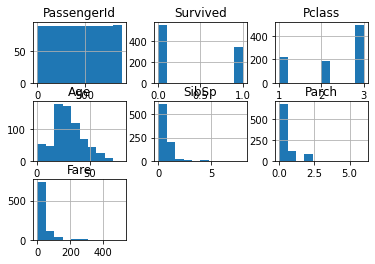

In [ ]:
train_data.hist()
plt.show()

In [ ]:
# DV = variables a pronosticar o variables dependiente
# IV = variables explicativas o variables independiente


In [ ]:
train_data

In [ ]:
train_data

In [ ]:
train_data

In [ ]:
train_data

In [ ]:
train_data

In [ ]:
train_data